<a href="https://colab.research.google.com/github/M-A-Lopa/GPU-vs-CPU-performance/blob/main/GPU_vs_CPU_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

# **Data Visualaization**


Cross checking with our y_train outputs with plot images --> whether they are correct or not

In [ ]:
y_train[0:5]
#9 is ankle boot
#o is t-shirt/Top
#3 is dress

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
def plot_sample(index):
    plt.figure(figsize = (12,1))
    plt.imshow(x_train[index])

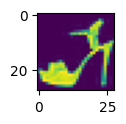

In [ ]:
plot_sample(9)

# **Preprocessing : Scaling**

In [ ]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255

In [ ]:
#using one hot encoding
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
y_train[0:5]#descrete value not categorical or scaled value

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# **Building MLP NN**

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),#imput layer --> using flatten to convert 2d array into 1d
        keras.layers.Dense(3000, activation='relu'),#2 hidden layer
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')  #output layer
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)
#used categorical not descret y_train
#so use categorical_crossentropy instead of sparse categorical


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7355 - loss: 0.8630
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8392 - loss: 0.4673
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8540 - loss: 0.4180
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8632 - loss: 0.3925
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8715 - loss: 0.3678
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8759 - loss: 0.3522
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8815 - loss: 0.3345
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8834 - loss: 0.3240
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8911 - loss: 0.3096
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8910 - loss: 0.3035
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8969 - loss: 0.2918
Epoch 12/50
1875/1875 ━

# **Doing prediction**

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
model.predict(X_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.02995992, 0.02303591, 0.30526245, 0.01825299, 0.04716   ,
       0.9818351 , 0.08532064, 0.99517787, 0.77531254, 0.9999968 ],
      dtype=float32)

In [ ]:
class_names[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


'Ankle boot'

In [ ]:
class_names[y_test[0]]

'Ankle boot'

# **Measuring running time on CPU**

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.7374 - loss: 0.8490
57.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# **Measuring running time on GPU**

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7363 - loss: 0.8506
6.85 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# **For CPU when epoch is 10**

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

# **For GPU when epoch is 10**

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)